# Load Forecasting 

In [1]:
#Importing the necessary library for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the data
df = pd.read_csv("AssignmentData.csv")
df.head()

,Unnamed: 0,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01
1,1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01
2,2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01
3,3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01
4,4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01


# Exploratory data analysis

In [3]:
#Removing the unnecessary columns
df.drop("Unnamed: 0", axis = 1, inplace =True)

In [4]:
df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01


In [5]:
df.dtypes

datetime                 object
load                    float64
apparent_temperature    float64
temperature             float64
humidity                float64
dew_point               float64
wind_speed              float64
cloud_cover             float64
date                     object
dtype: object

In [6]:
df.isna().sum()

datetime                   0
load                    1632
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_speed                 0
cloud_cover                0
date                       0
dtype: int64

## Data Extraction

It seems only the load column contains the NAN values, Convertion of date time and extract the necessay features.

In [7]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [8]:
df["datetime"]

0        2018-01-01 00:00:00
1        2018-01-01 00:15:00
2        2018-01-01 00:30:00
3        2018-01-01 00:45:00
4        2018-01-01 01:00:00
                 ...        
103579   2020-12-14 22:45:00
103580   2020-12-14 23:00:00
103581   2020-12-14 23:15:00
103582   2020-12-14 23:30:00
103583   2020-12-14 23:45:00
Name: datetime, Length: 103584, dtype: datetime64[ns]

In [9]:
df["time"] = df["datetime"].dt.time
df["month"] = df["datetime"].dt.month
df["year"] =  df["datetime"].dt.year
df["day"] = df["datetime"].dt.day_name()
df["month_name"]=df["datetime"].dt.month_name()

In [10]:
df.iloc[100000]

datetime                2020-11-07 16:00:00
load                              1121.2717
apparent_temperature                31.6995
temperature                         31.6995
humidity                              0.126
dew_point                            -2.772
wind_speed                           2.7195
cloud_cover                             0.0
date                             2020-11-07
time                               16:00:00
month                                    11
year                                   2020
day                                Saturday
month_name                         November
Name: 100000, dtype: object

In [11]:
df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,time,month,year,day,month_name
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,00:00:00,1,2018,Monday,January
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,00:15:00,1,2018,Monday,January
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,00:30:00,1,2018,Monday,January
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,00:45:00,1,2018,Monday,January
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,01:00:00,1,2018,Monday,January


In [12]:
df.corr()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,month,year
load,1.000000,0.744866,0.675415,-0.089618,0.585815,0.216450,0.268026,0.106799,-0.101725
apparent_temperature,0.744866,1.000000,0.962795,-0.313628,0.645864,0.321770,0.258003,0.155414,0.019338
temperature,0.675415,0.962795,1.000000,-0.500768,0.487387,0.338306,0.145123,0.109900,0.023363
humidity,-0.089618,-0.313628,-0.500768,1.000000,0.468220,-0.228351,0.332571,0.064254,-0.140115
dew_point,0.585815,0.645864,0.487387,0.468220,1.000000,0.103396,0.472508,0.206607,-0.099629
wind_speed,0.216450,0.321770,0.338306,-0.228351,0.103396,1.000000,0.109651,-0.175871,0.071047
cloud_cover,0.268026,0.258003,0.145123,0.332571,0.472508,0.109651,1.000000,0.030842,0.027675
month,0.106799,0.155414,0.109900,0.064254,0.206607,-0.175871,0.030842,1.000000,-0.033129
year,-0.101725,0.019338,0.023363,-0.140115,-0.099629,0.071047,0.027675,-0.033129,1.000000


In [13]:
df.dtypes

datetime                datetime64[ns]
load                           float64
apparent_temperature           float64
temperature                    float64
humidity                       float64
dew_point                      float64
wind_speed                     float64
cloud_cover                    float64
date                            object
time                            object
month                            int64
year                             int64
day                             object
month_name                      object
dtype: object

In [14]:
df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,time,month,year,day,month_name
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01,00:00:00,1,2018,Monday,January
1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01,00:15:00,1,2018,Monday,January
2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01,00:30:00,1,2018,Monday,January
3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01,00:45:00,1,2018,Monday,January
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01,01:00:00,1,2018,Monday,January


# Data visualization

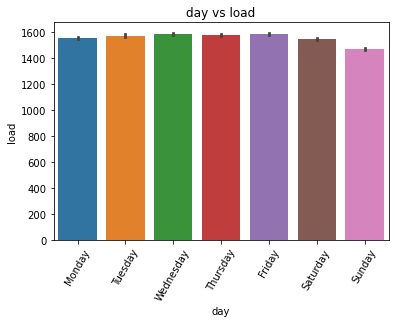

In [15]:
sns.barplot(x=df["day"], y=df["load"])
plt.xticks(rotation=60)
plt.xlabel("day")
plt.ylabel("load")
plt.title("day vs load");

It seems sunday is the load is reduced, its due to the holiday for the industries.

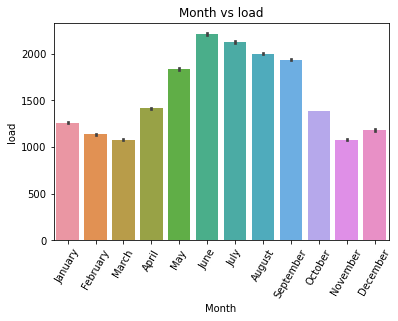

In [16]:
sns.barplot(x=df["month_name"], y=df["load"])
plt.xticks(rotation=60)
plt.xlabel("Month");
plt.ylabel("load")
plt.title("Month vs load");

During the sesonal change to summer load is increased..

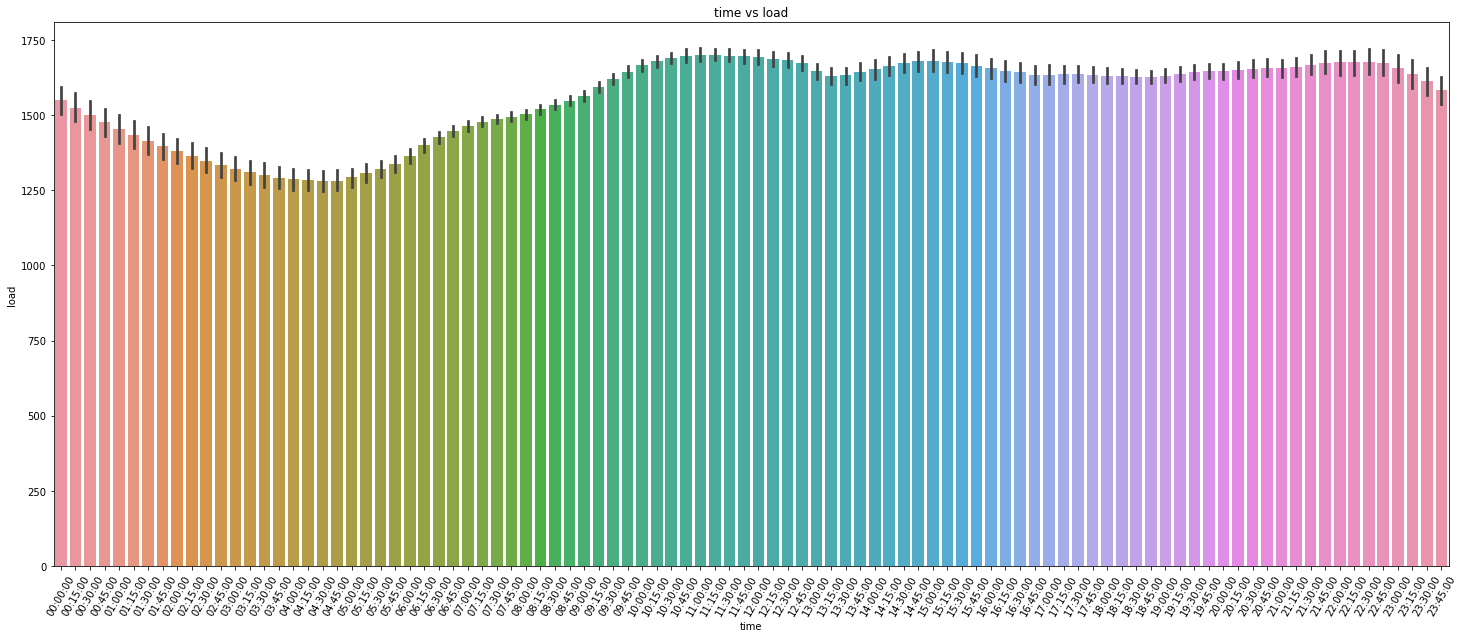

In [17]:
plt.figure(figsize=(25,10))
sns.barplot(x=df["time"], y=df["load"])
plt.xticks(rotation=60)
plt.xlabel("time")
plt.ylabel("load")
plt.title("time vs load");

It seem morning the data load is reduced this is mainly due to offtime for the employees.

In [18]:
#Encoding the minute column to extract the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
df['time_label']= le.fit_transform(df['time'])
df['day_label']= le.fit_transform(df['day'])

In [20]:
df.tail()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,time,month,year,day,month_name,time_label,day_label
103579,2020-12-14 22:45:00,NaN,12.450375,12.450375,0.611625,4.087125,1.9110,0.0000,2020-12-14,22:45:00,12,2020,Monday,December,91,1
103580,2020-12-14 23:00:00,NaN,12.285000,12.285000,0.619500,4.084500,1.8795,0.0000,2020-12-14,23:00:00,12,2020,Monday,December,92,1
103581,2020-12-14 23:15:00,NaN,13.650000,13.650000,0.829500,8.589000,2.4675,0.8925,2020-12-14,23:15:00,12,2020,Monday,December,93,1
103582,2020-12-14 23:30:00,NaN,13.650000,13.650000,0.829500,8.610000,2.4150,0.8925,2020-12-14,23:30:00,12,2020,Monday,December,94,1
103583,2020-12-14 23:45:00,NaN,13.387500,13.387500,0.840000,8.662500,2.4150,0.8610,2020-12-14,23:45:00,12,2020,Monday,December,95,1


In [21]:
df.day_label.value_counts()

1    14880
5    14784
6    14784
4    14784
0    14784
2    14784
3    14784
Name: day_label, dtype: int64

In [22]:
df.describe()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,month,year,time_label,day_label
count,101952.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000,103584.000000
mean,1558.964330,29.084052,27.080153,0.602338,15.890729,2.431892,0.329437,6.435589,2018.985171,47.500000,2.998146
std,531.116557,10.411410,8.496460,0.235395,7.938254,1.365737,0.334519,3.406285,0.813333,27.711443,2.000009
min,480.631730,2.173500,3.685500,0.042000,-13.692000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,1184.992600,20.590500,20.559000,0.420000,9.783375,1.477875,0.000000,3.000000,2018.000000,23.750000,1.000000
50%,1496.820000,29.922375,28.621688,0.609000,14.899500,2.352000,0.215250,6.000000,2019.000000,47.500000,3.000000
75%,1935.745800,37.458750,33.348000,0.798000,23.887500,3.286500,0.582750,9.000000,2020.000000,71.250000,5.000000
max,3230.848600,56.731500,47.943000,1.050000,31.059000,10.321500,1.050000,12.000000,2020.000000,95.000000,6.000000


In [23]:
df.dtypes

datetime                datetime64[ns]
load                           float64
apparent_temperature           float64
temperature                    float64
humidity                       float64
dew_point                      float64
wind_speed                     float64
cloud_cover                    float64
date                            object
time                            object
month                            int64
year                             int64
day                             object
month_name                      object
time_label                       int32
day_label                        int32
dtype: object

In [24]:
final_df = df[["load", "apparent_temperature", "temperature", "humidity", 
                      "dew_point", "wind_speed", "cloud_cover","month",
                      "time_label","day_label"]]

In [25]:
final_df.head()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,month,time_label,day_label
0,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,1,0,1
1,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,1,1,1
2,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,1,2,1
3,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,1,3,1
4,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,1,4,1


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103584 entries, 0 to 103583
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   load                  101952 non-null  float64
 1   apparent_temperature  103584 non-null  float64
 2   temperature           103584 non-null  float64
 3   humidity              103584 non-null  float64
 4   dew_point             103584 non-null  float64
 5   wind_speed            103584 non-null  float64
 6   cloud_cover           103584 non-null  float64
 7   month                 103584 non-null  int64  
 8   time_label            103584 non-null  int32  
 9   day_label             103584 non-null  int32  
dtypes: float64(7), int32(2), int64(1)
memory usage: 7.1 MB


# Model building

In [27]:
final_df.isna().sum()

load                    1632
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_speed                 0
cloud_cover                0
month                      0
time_label                 0
day_label                  0
dtype: int64

In [28]:
#Splitting the data
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103584 entries, 0 to 103583
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   load                  101952 non-null  float64
 1   apparent_temperature  103584 non-null  float64
 2   temperature           103584 non-null  float64
 3   humidity              103584 non-null  float64
 4   dew_point             103584 non-null  float64
 5   wind_speed            103584 non-null  float64
 6   cloud_cover           103584 non-null  float64
 7   month                 103584 non-null  int64  
 8   time_label            103584 non-null  int32  
 9   day_label             103584 non-null  int32  
dtypes: float64(7), int32(2), int64(1)
memory usage: 7.1 MB


In [29]:
#Using 90 percent of data for test and 10 percent for test
train_df = final_df[:93226]

In [30]:
len(final_df)/10

10358.4

In [31]:
round(len(final_df)-len(final_df)/10)

93226

In [32]:
train_df

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,month,time_label,day_label
0,803.22270,10.458000,10.458000,0.955500,8.946000,0.000000,0.00000,1,0,1
1,774.89523,10.326750,10.326750,0.961625,8.911875,0.000000,0.00000,1,1,1
2,731.46927,10.195500,10.195500,0.967750,8.877750,0.000000,0.00000,1,2,1
3,713.93870,10.064250,10.064250,0.973875,8.843625,0.000000,0.00000,1,3,1
4,699.23007,9.933000,9.933000,0.980000,8.809500,0.000000,0.00000,1,4,1
...,...,...,...,...,...,...,...,...,...,...
93221,1793.76000,30.093000,27.628125,0.905625,25.095000,1.546125,0.19950,8,5,2
93222,1768.51000,29.914500,27.546750,0.908250,25.053000,1.496250,0.15750,8,6,2
93223,1746.29000,29.736000,27.465375,0.910875,25.011000,1.446375,0.11550,8,7,2
93224,1728.11000,29.557500,27.384000,0.913500,24.969000,1.396500,0.07350,8,8,2


In [33]:
train_df.isna().sum()

load                    1152
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_speed                 0
cloud_cover                0
month                      0
time_label                 0
day_label                  0
dtype: int64

In [34]:
#Using 90 percent of data for test and 10 percent for test
test_df = final_df[93226:]
test_df

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,month,time_label,day_label
93226,1683.6700,28.869750,27.137250,0.918750,24.806250,1.323000,0.042000,8,10,2
93227,1669.5300,28.525875,27.013875,0.921375,24.724875,1.286250,0.026250,8,11,2
93228,1646.4616,28.182000,26.890500,0.924000,24.643500,1.249500,0.010500,8,12,2
93229,1631.3722,28.268625,26.932500,0.921375,24.619875,1.231125,0.013125,8,13,2
93230,1618.2422,28.355250,26.974500,0.918750,24.596250,1.212750,0.015750,8,14,2
...,...,...,...,...,...,...,...,...,...,...
103579,NaN,12.450375,12.450375,0.611625,4.087125,1.911000,0.000000,12,91,1
103580,NaN,12.285000,12.285000,0.619500,4.084500,1.879500,0.000000,12,92,1
103581,NaN,13.650000,13.650000,0.829500,8.589000,2.467500,0.892500,12,93,1
103582,NaN,13.650000,13.650000,0.829500,8.610000,2.415000,0.892500,12,94,1


In [35]:
test_df.isna().sum()

load                    480
apparent_temperature      0
temperature               0
humidity                  0
dew_point                 0
wind_speed                0
cloud_cover               0
month                     0
time_label                0
day_label                 0
dtype: int64

In [36]:
len(train_df), len(test_df)

(93226, 10358)

In [37]:
train_df.shape, test_df.shape

((93226, 10), (10358, 10))

In [38]:
#Data Imputation to remove the NaN values
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
my_imputer = pd.DataFrame(my_imputer.fit_transform(train_df))

# Imputation removed column names; put them back
my_imputer.columns = train_df.columns

#Model
from sklearn.ensemble import RandomForestRegressor

#Dependent and independent varaible
train_y = my_imputer["load"]
train_X = my_imputer.drop("load", axis=1)

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)

RandomForestRegressor()

In [39]:
#Data Imputation to remove the NaN values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = pd.DataFrame(imputer.fit_transform(test_df))

# Imputation removed column names; put them back
imputer.columns = test_df.columns

In [40]:
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = imputer.drop("load", axis=1)
test_y = imputer.load
# Use the model to make predictions
predicted_prices = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[1561.346274  1544.956701  1502.84465   ...  951.5010525  920.3580661
  902.0872772]


In [41]:
predicted_prices[-96:]

array([ 831.8690775,  811.8665123,  777.2586502,  721.5062361,
        703.9117028,  692.7893505,  667.2356031,  657.4340379,
        652.4829068,  645.362831 ,  643.9094713,  642.7325486,
        644.2698595,  643.3304787,  655.4923129,  655.0375503,
        678.574964 ,  688.9667429,  716.4327031,  746.7039989,
        780.1752676,  856.4249651,  932.2890749, 1020.0100696,
       1143.348381 , 1276.4777031, 1417.1659561, 1462.287393 ,
       1509.846879 , 1599.40873  , 1637.558248 , 1662.962172 ,
       1695.512856 , 1719.402891 , 1721.482582 , 1718.358955 ,
       1715.554791 , 1705.886667 , 1722.185037 , 1721.938698 ,
       1729.84013  , 1724.48511  , 1719.052118 , 1679.627273 ,
       1668.101456 , 1654.340307 , 1650.962968 , 1633.417147 ,
       1611.760727 , 1576.551016 , 1543.237176 , 1520.830124 ,
       1445.692891 , 1378.411842 , 1345.905396 , 1339.265353 ,
       1319.220388 , 1284.509819 , 1290.553457 , 1293.902112 ,
       1294.082094 , 1311.061709 , 1311.017875 , 1292.9

In [42]:
my_submission = pd.DataFrame({'Date_time': df.date[-96:], "time": df.time[-96:], 'Forecast': predicted_prices[-96:]})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [43]:
#Mean absolute percentage Error
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(test_y, predicted_prices))

0.08881359653599885
